<a href="https://colab.research.google.com/github/jjaime0502/Actividad_5/blob/main/Actividad5(RegresionLinealSimple)_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as sns
model1=LinearRegression()

## DF -  México

In [ ]:
#Cargar un archivo
df=pd.read_csv("DF_Mexico.csv",error_bad_lines=False)
df.set_index("id", inplace=True)

In [ ]:
#Obtenemps información
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 2056638 to 854260329845513725
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   24224 non-null  object 
 1   scrape_id                                     24224 non-null  int64  
 2   last_scraped                                  24224 non-null  object 
 3   source                                        24224 non-null  object 
 4   name                                          24223 non-null  object 
 5   description                                   23296 non-null  object 
 6   neighborhood_overview                         15145 non-null  object 
 7   picture_url                                   24224 non-null  object 
 8   host_id                                       24224 non-null  int64  
 9   host_url                                  

In [ ]:
#Sacamos una copia del df
df2=df.copy()
df2.head(3)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31


# **Modificación de Columnas**

In [ ]:
#Convertimos host_response_rate,host_acceptance_rate y price a tipo float
df2['host_response_rate'] = df2['host_response_rate'].str.replace('%', '').astype(float)
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace('%', '').astype(float)
df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].str.replace('$', '').astype(float)

#Se eliminan columnas vacias que solo tienen valores nulos
df2.drop(columns=['neighbourhood_group_cleansed', 'bathrooms','calendar_updated','license',], inplace=True)



<ipython-input-15-265543438bfc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$', '').astype(float)


In [ ]:
#Se identifican valores nulos del df2
df2.isnull().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 70, dtype: int64

# **Sustitución de nulos**

In [ ]:
#Se seleccionan todas las columnas tipo object
df2_objet= df2.select_dtypes(include=['object'])
df2_objet.head(3)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,Coyoacán,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,2023-03-30,2014-01-03,2018-06-24,f
2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,Coyoacán,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,2023-03-30,2014-01-01,2022-11-04,f
696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",t,2023-03-29,2012-10-31,2022-12-21,f


In [ ]:
#Se identifican y sustituyen los valores nulos tipo object por "Unknow"
df2_objet=df2_objet.fillna("Unknow")
df2_objet.isnull().sum().sum()

0

In [ ]:
#Se seleccionan todas las columnas tipo int y float
pd.set_option('display.max_columns', None)
df2_numeric= df2.select_dtypes(include=['int', 'float'])
df2_numeric.head(3)

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2056638,20230329041210,10531228,100.0,NaN,3,7,19.35353,-99.16299,3,1.0,1.0,1434.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21,0,0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3,3,0,0,0.19
2072354,20230329041210,16840050,NaN,NaN,3,3,19.35358,-99.16948,2,1.0,1.0,830.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61,1,0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2,2,0,0,0.54
696037,20230329041210,3531879,100.0,90.0,4,4,19.44180,-99.18402,6,3.0,3.0,1469.0,24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39,2,0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3,3,0,0,0.31


In [ ]:
df2_numeric.isnull().sum()

scrape_id                                          0
host_id                                            0
host_response_rate                              3091
host_acceptance_rate                            2043
host_listings_count                                0
host_total_listings_count                          0
latitude                                           0
longitude                                          0
accommodates                                       0
bedrooms                                         555
beds                                             271
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             1
maximum_minimum_nights                             1
minimum_maximum_nights                             1
maximum_maximum_nights                             1
minimum_nights_avg_ntm                        

In [ ]:
#Se sustituyen las siguientes columnas por la media
df2_numeric["host_response_rate"]=df2_numeric["host_response_rate"].fillna(round(df2_numeric["host_response_rate"].mean(),1))
df2_numeric["host_acceptance_rate"]=df2_numeric["host_acceptance_rate"].fillna(round(df2_numeric["host_acceptance_rate"].mean(),1))

df2_numeric["review_scores_rating"]=df2_numeric["review_scores_rating"].fillna(round(df2_numeric["review_scores_rating"].mean(),1))
df2_numeric["review_scores_accuracy"]=df2_numeric["review_scores_accuracy"].fillna(round(df2_numeric["review_scores_accuracy"].mean(),1))
df2_numeric["review_scores_cleanliness"]=df2_numeric["review_scores_cleanliness"].fillna(round(df2_numeric["review_scores_cleanliness"].mean(),1))
df2_numeric["review_scores_checkin"]=df2_numeric["review_scores_checkin"].fillna(round(df2_numeric["review_scores_checkin"].mean(),1))
df2_numeric["review_scores_communication"]=df2_numeric["review_scores_communication"].fillna(round(df2_numeric["review_scores_communication"].mean(),1))
df2_numeric["review_scores_location"]=df2_numeric["review_scores_location"].fillna(round(df2_numeric["review_scores_location"].mean(),1))
df2_numeric["review_scores_value"]=df2_numeric["review_scores_value"].fillna(round(df2_numeric["review_scores_value"].mean(),1))
df2_numeric["reviews_per_month"]=df2_numeric["reviews_per_month"].fillna(round(df2_numeric["reviews_per_month"].mean(),1))

#Se sustituyen las siguientes columnas por la mediana
df2_numeric["minimum_minimum_nights"]=df2_numeric["minimum_minimum_nights"].fillna(round(df2_numeric["minimum_minimum_nights"].median(),1))
df2_numeric["maximum_minimum_nights"]=df2_numeric["maximum_minimum_nights"].fillna(round(df2_numeric["maximum_minimum_nights"].median(),1))
df2_numeric["minimum_maximum_nights"]=df2_numeric["minimum_maximum_nights"].fillna(round(df2_numeric["minimum_maximum_nights"].median(),1))
df2_numeric["maximum_maximum_nights"]=df2_numeric["maximum_maximum_nights"].fillna(round(df2_numeric["maximum_maximum_nights"].median(),1))
df2_numeric["minimum_nights_avg_ntm"]=df2_numeric["minimum_nights_avg_ntm"].fillna(round(df2_numeric["minimum_nights_avg_ntm"].median(),1))
df2_numeric["maximum_nights_avg_ntm"]=df2_numeric["maximum_nights_avg_ntm"].fillna(round(df2_numeric["maximum_nights_avg_ntm"].median(),1))

#Se sustituyen las siguientes columnas por el método foward fill
df2_numeric["bedrooms"]=df2_numeric["bedrooms"].fillna(method="ffill")
df2_numeric["beds"]=df2_numeric["beds"].fillna(method="ffill")

#Verificamos valores nulos
df2_numeric.isnull().sum()

scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


# **Sustitución de outliers**

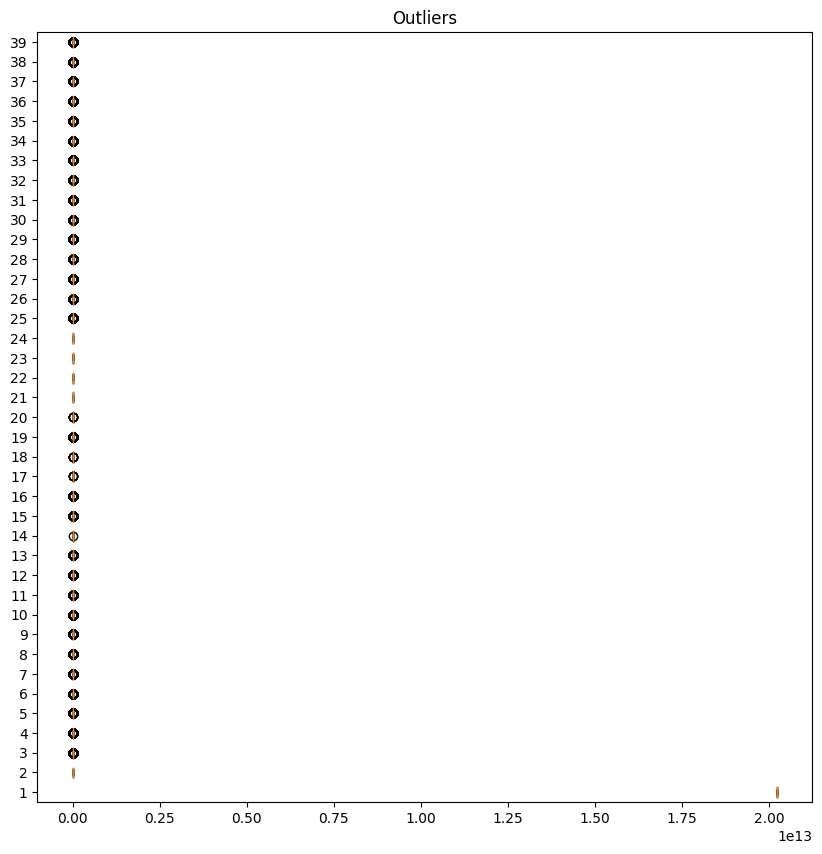

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.boxplot(df2_numeric,vert=False)
plt.title("Outliers")
plt.show()

In [ ]:
#Aplicación de desviación estandar
y=df2_numeric
limite_superior=y.mean()+2.5*y.std()
limite_inferior=y.mean()-2.5*y.std()

print("Limite superior: ",limite_superior)
print("Limite inferior: ",limite_inferior)


Limite superior:  scrape_id                                       2.023033e+13
host_id                                         5.740572e+08
host_response_rate                              1.369872e+02
host_acceptance_rate                            1.412332e+02
host_listings_count                             2.142863e+02
host_total_listings_count                       3.597149e+02
latitude                                        1.951096e+01
longitude                                      -9.908269e+01
accommodates                                    8.824870e+00
bedrooms                                        4.438778e+00
beds                                            6.118989e+00
price                                           4.739523e+04
minimum_nights                                  7.153522e+01
maximum_nights                                  1.785984e+03
minimum_minimum_nights                          6.287613e+01
maximum_minimum_nights                          6.382119e+01
minimu

In [ ]:
#Obtenemos los valores atípicos
#Al analizar los datos vemos que los datos aunque sean nulos corresponden
#por lo que no se hara sustitución de nulos.
atipicos = df2_numeric[(y > limite_superior)|(y < limite_inferior)]

In [ ]:
df_clean= pd.concat([df2_objet, df2_numeric], axis=1)

In [ ]:
df_clean

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,Unknow,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",Unknow,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,Unknow,Coyoacán,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,2023-03-30,2014-01-03,2018-06-24,f,20230329041210,10531228,100.0,91.5,3,7,19.353530,-99.162990,3,1.0,1.0,1434.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21,0,0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3,3,0,0,0.19
2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",Unknow,Unknow,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,Unknow,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,2023-03-30,2014-01-01,2022-11-04,f,20230329041210,16840050,94.5,91.5,3,3,19.353580,-99.169480,2,1.0,1.0,830.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61,1,0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2,2,0,0,0.54
696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",t,2023-03-29,2012-10-31,2022-12-21,f,20230329041210,3531879,100.0,90.0,4,4,19.441800,-99.184020,6,3.0,3.0,1469.0,24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39,2,0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3,3,0,0,0.31
35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un e

**COMPARACIÓN CON EL TIPO 'HOTEL ROOM' **

room_type = 'Hotel room'

In [ ]:
data_filtrado = df_clean[df_clean['room_type'] == 'Hotel room']
hotel_filtro= data_filtrado.loc[ : , ['room_type','host_acceptance_rate', 'host_response_rate', 'review_scores_location','review_scores_cleanliness','price','availability_365','number_of_reviews','reviews_per_month','review_scores_communication']]
hotel_filtro.set_index('room_type')

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
room_type,,,,,,,,,
Hotel room,87.0,90.0,4.83,4.83,1006.0,340,23,0.18,5.0
Hotel room,87.0,90.0,4.97,4.94,1006.0,332,31,0.25,5.0
Hotel room,87.0,90.0,5.00,4.92,908.0,350,49,0.46,5.0
Hotel room,87.0,90.0,4.95,4.95,908.0,356,22,0.25,5.0
Hotel room,86.0,100.0,5.00,5.00,3162.0,287,7,0.07,5.0
...,...,...,...,...,...,...,...,...,...
Hotel room,100.0,100.0,5.00,5.00,0.0,0,3,0.12,5.0
Hotel room,91.5,94.5,4.80,4.70,0.0,0,0,1.70,4.8
Hotel room,100.0,94.5,4.80,4.70,0.0,0,0,1.70,4.8


**Análisis de Correlación**

<ipython-input-28-4f6b7dd38bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_hotelroom = hotel_filtro.corr()


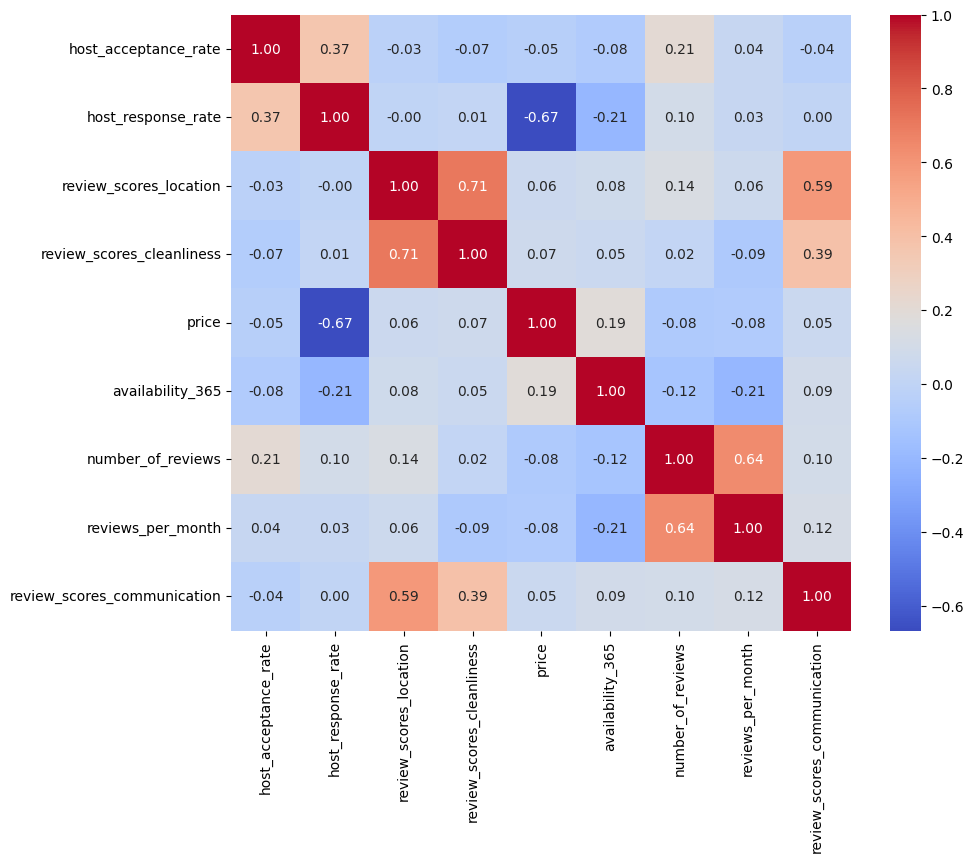

In [ ]:
correlation_hotelroom = hotel_filtro.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hotelroom, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
#A) “host_acceptance_rate" vs "host_response_rate”
correlation1 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['host_response_rate'])
print(correlation1)

0.36733748344112066


In [ ]:
#B) “host_acceptance_rate vs price”
correlation2 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['price'])
print(correlation2)

-0.045234479292531854


In [ ]:
#C) “host_acceptance_rate" vs "number_of_reviews ”
correlation3 = hotel_filtro['host_acceptance_rate'].corr(hotel_filtro['number_of_reviews'])
print(correlation3)

0.20892750618941872


In [ ]:
#D)“review_scores_location" vs "review_scores_cleanliness”
correlation4 = hotel_filtro['review_scores_location'].corr(hotel_filtro['review_scores_cleanliness'])
print(correlation4)

0.7084826740006896


In [ ]:
#E)“availability_365" vs "number_of_reviews”
correlation5 = hotel_filtro['availability_365'].corr(hotel_filtro['number_of_reviews'])
print(correlation5)

-0.12183764607284574


In [ ]:
#F)“reviews_per_month vs review_scores_communication”
correlation6 = hotel_filtro['reviews_per_month'].corr(hotel_filtro['review_scores_communication'])
print(correlation6)

0.1174896497135772


**Crear el modelo matemático utilizando la variable con mayor correlación.**

Variables con mayor correlación

“review_scores_location" vs "review_scores_cleanliness”

In [ ]:
Vars_Indep = hotel_filtro[['review_scores_cleanliness']]
Var_Dep=hotel_filtro['review_scores_location']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.71790653]),
 'rank_': 1,
 'singular_': array([3.18227943]),
 'intercept_': 1.41489079217234}

Modelo matemático

y = 0.71790653x + 1.41489079217234

In [ ]:
y_pred=model.predict(X=hotel_filtro[['review_scores_cleanliness']])
y_pred

array([4.88237931, 4.96134903, 4.9469909 , 4.96852809, 5.00442342,
       5.00442342, 5.00442342, 4.96852809, 5.00442342, 4.18600998,
       4.9469909 , 4.78905146, 5.00442342, 5.00442342, 5.00442342,
       5.00442342, 4.93263277, 4.93981183, 4.78905146, 4.82494679,
       4.78905146, 4.93981183, 4.85366305, 5.00442342, 4.83212585,
       4.9254537 , 5.00442342, 4.70290268, 4.7818724 , 4.85366305,
       5.00442342, 4.7818724 , 4.86802118, 4.93263277, 4.86084212,
       4.88955838, 3.92756363, 4.78905146, 4.78905146, 5.00442342,
       4.86084212, 4.99006529, 4.91827464, 4.68854455, 4.71726081,
       4.2865169 , 4.55932137, 4.76751427, 4.5952167 , 4.2865169 ,
       4.04960774, 4.78905146, 5.00442342, 5.00442342, 5.00442342,
       4.52342605, 4.93981183, 5.00442342, 5.00442342, 5.00442342,
       5.00442342, 4.49470979, 4.53060511, 4.35112848, 4.4516354 ,
       4.54496324, 4.60239577, 4.76751427, 5.00442342, 4.5952167 ,
       4.78905146, 5.00442342, 5.00442342, 4.78905146, 4.74597

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
hotel_filtro.insert(0, 'Predicciones_scores_cleanliness', y_pred)
hotel_filtro

,Predicciones_scores_cleanliness,room_type,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
id,,,,,,,,,,,
737328,4.882379,Hotel room,87.0,90.0,4.83,4.83,1006.0,340,23,0.18,5.0
865012,4.961349,Hotel room,87.0,90.0,4.97,4.94,1006.0,332,31,0.25,5.0
868843,4.946991,Hotel room,87.0,90.0,5.00,4.92,908.0,350,49,0.46,5.0
869063,4.968528,Hotel room,87.0,90.0,4.95,4.95,908.0,356,22,0.25,5.0
281134,5.004423,Hotel room,86.0,100.0,5.00,5.00,3162.0,287,7,0.07,5.0
...,...,...,...,...,...,...,...,...,...,...,...
43205383,5.004423,Hotel room,100.0,100.0,5.00,5.00,0.0,0,3,0.12,5.0
43247503,4.789051,Hotel room,91.5,94.5,4.80,4.70,0.0,0,0,1.70,4.8
43247525,4.789051,Hotel room,100.0,94.5,4.80,4.70,0.0,0,0,1.70,4.8


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

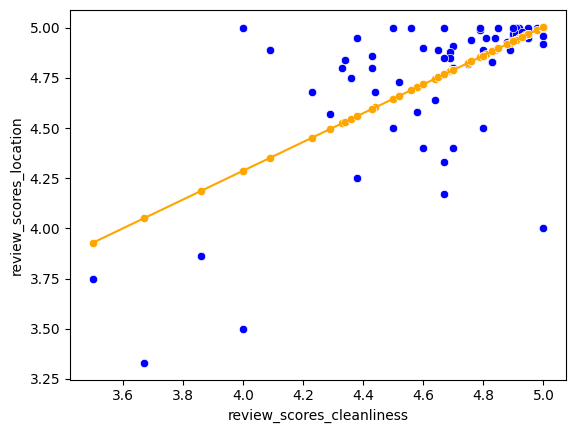

In [ ]:
#visualizamos la gráfica comparativa entrel total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=hotel_filtro)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness', color='orange', data=hotel_filtro)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness', color='orange', data=hotel_filtro)

In [ ]:
#Comparación de ambas columnas
comparacion = hotel_filtro[['Predicciones_scores_cleanliness','review_scores_cleanliness']]
comparacion

,Predicciones_scores_cleanliness,review_scores_cleanliness
id,,
737328,4.882379,4.83
865012,4.961349,4.94
868843,4.946991,4.92
869063,4.968528,4.95
281134,5.004423,5.00
...,...,...
43205383,5.004423,5.00
43247503,4.789051,4.70
43247525,4.789051,4.70


In [ ]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5019476993591685

In [ ]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7084826740006903

**COMPARACIÓN CON EL TIPO 'Private room' **

room_type = 'Private room'

In [ ]:
data_filtrado2 = df_clean[df_clean['room_type'] == 'Private room']
private_filtro= data_filtrado2.loc[ : , ['room_type','host_acceptance_rate', 'host_response_rate', 'review_scores_location','review_scores_cleanliness','price','availability_365','number_of_reviews','reviews_per_month','review_scores_communication']]
private_filtro.set_index('room_type')

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
room_type,,,,,,,,,
Private room,100.0,100.0,4.94,4.9,1089.0,168,62,0.94,4.95
Private room,0.0,94.5,4.80,4.2,726.0,363,5,0.04,4.60
Private room,91.5,0.0,4.40,4.6,375.0,284,5,0.04,4.80
Private room,0.0,94.5,4.80,4.7,2835.0,365,0,1.70,4.80
Private room,91.5,100.0,4.80,4.7,1244.0,88,0,1.70,4.80
...,...,...,...,...,...,...,...,...,...
Private room,91.5,94.5,4.80,4.7,1280.0,301,0,1.70,4.80
Private room,91.5,94.5,4.80,4.7,750.0,176,0,1.70,4.80
Private room,100.0,100.0,4.80,4.7,600.0,345,0,1.70,4.80


Análisis de Correlación

<ipython-input-43-130b8e3f4776>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_privateroom = private_filtro.corr()


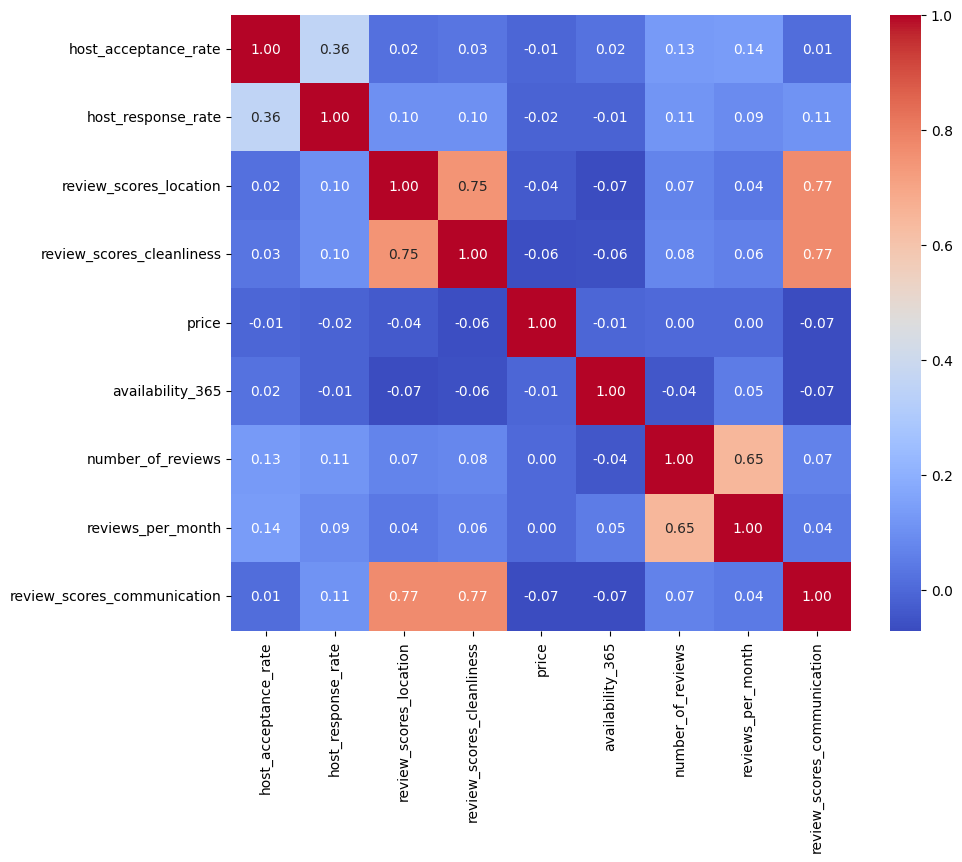

In [ ]:
correlation_privateroom = private_filtro.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_privateroom, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
#A) “host_acceptance_rate" vs "host_response_rate”
correlation1priv = private_filtro['host_acceptance_rate'].corr(private_filtro['host_response_rate'])
print(correlation1priv)

0.35650143000195256


In [ ]:
#B) “host_acceptance_rate vs price”
correlation2priv = private_filtro['host_acceptance_rate'].corr(private_filtro['price'])
print(correlation2priv)

-0.006080513238546444


In [ ]:
#C) “host_acceptance_rate" vs "number_of_reviews ”
correlation3priv = private_filtro['host_acceptance_rate'].corr(private_filtro['number_of_reviews'])
print(correlation3priv)

0.1324507493515266


In [ ]:
#D)“review_scores_location" vs "review_scores_cleanliness”
correlation4priv = private_filtro['review_scores_location'].corr(private_filtro['review_scores_cleanliness'])
print(correlation4priv)

0.7454427942922326


In [ ]:
#E)“availability_365" vs "number_of_reviews”
correlation5priv = private_filtro['availability_365'].corr(private_filtro['number_of_reviews'])
print(correlation5priv)

-0.042996977734164894


In [ ]:
#F)“reviews_per_month vs review_scores_communication”
correlation6priv = private_filtro['reviews_per_month'].corr(private_filtro['review_scores_communication'])
print(correlation6priv)

0.043511973777238


**Crear el modelo matemático utilizando la variable con mayor correlación**

Variables con mayor correlación

“review_scores_location" vs "review_scores_cleanliness”

In [ ]:
Vars_Indep = private_filtro[['review_scores_cleanliness']]
Var_Dep=private_filtro['review_scores_location']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.65774895]),
 'rank_': 1,
 'singular_': array([44.81083408]),
 'intercept_': 1.7115836796097579}

Modelo Matemático


y = 0.65774895x + 1.7115836796097579

In [ ]:
y_pred=model.predict(X=private_filtro[['review_scores_cleanliness']])
y_pred

array([4.93455354, 4.47412927, 4.73722885, ..., 4.80300375, 4.80300375,
       4.80300375])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_filtro.insert(0, 'Predicciones_scores_cleanliness_privateroom', y_pred)
private_filtro

,Predicciones_scores_cleanliness_privateroom,room_type,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
id,,,,,,,,,,,
61792,4.934554,Private room,100.0,100.0,4.94,4.9,1089.0,168,62,0.94,4.95
760912,4.474129,Private room,0.0,94.5,4.80,4.2,726.0,363,5,0.04,4.60
2088218,4.737229,Private room,91.5,0.0,4.40,4.6,375.0,284,5,0.04,4.80
2093036,4.803004,Private room,0.0,94.5,4.80,4.7,2835.0,365,0,1.70,4.80
131610,4.803004,Private room,91.5,100.0,4.80,4.7,1244.0,88,0,1.70,4.80
...,...,...,...,...,...,...,...,...,...,...,...
856473895554110501,4.803004,Private room,91.5,94.5,4.80,4.7,1280.0,301,0,1.70,4.80
853707681690048732,4.803004,Private room,91.5,94.5,4.80,4.7,750.0,176,0,1.70,4.80
853746847434924262,4.803004,Private room,100.0,100.0,4.80,4.7,600.0,345,0,1.70,4.80


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

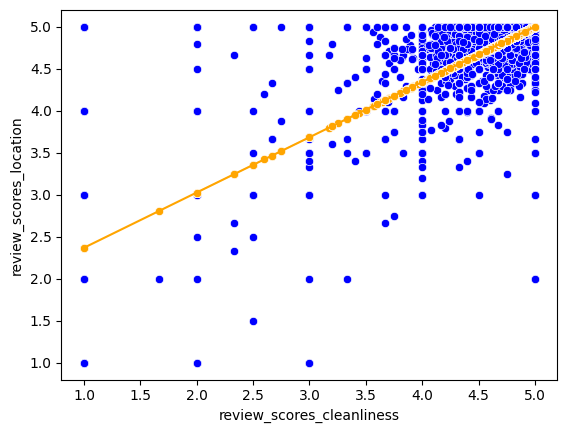

In [ ]:
#visualizamos la gráfica comparativa entrel total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=private_filtro)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness_privateroom', color='orange', data=private_filtro)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_scores_cleanliness_privateroom', color='orange', data=private_filtro)

In [ ]:
#Comparación de ambas columnas
comparacion2 = private_filtro[['Predicciones_scores_cleanliness_privateroom','review_scores_cleanliness']]
comparacion2

,Predicciones_scores_cleanliness_privateroom,review_scores_cleanliness
id,,
61792,4.934554,4.9
760912,4.474129,4.2
2088218,4.737229,4.6
2093036,4.803004,4.7
131610,4.803004,4.7
...,...,...
856473895554110501,4.803004,4.7
853707681690048732,4.803004,4.7
853746847434924262,4.803004,4.7


In [ ]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5556849595622114

In [ ]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7454427942922324